In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns

import wrangle_final
import env
from pydataset import data

np.set_printoptions(suppress=True)

In [2]:
from sklearn.cluster import KMeans

In [3]:
def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return dataframe (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    df['cluster'] = kmeans.predict(X_scaled)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return df, X_scaled, scaler, kmeans, centroids

In [4]:
def create_scatter_plot(x,y,df,kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

1. Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson. 

a. Visualize the results of your clustering. 

b. Use the elbow method to visually select a good value for k. 

c. Repeat the clustering, this time with 3 different features.

In [5]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
# create a cluster on two features

X = iris[['petal_width', 'sepal_width']]

In [8]:
# create three clusters from the iris dataframe on the features defined in X
# return df, X_scaled, scaler, kmeans, centroids (reference function return statement)

iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

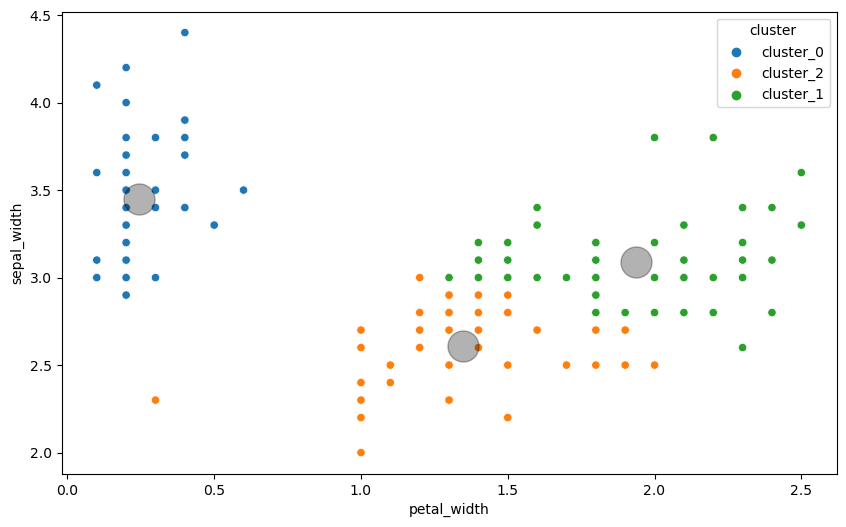

In [9]:
# use the function above to plot the data
# NOTE: sepal_width defined as X above, but now defined as y in this one (review function docstrings)

create_scatter_plot('petal_width', 'sepal_width',iris,kmeans, X_scaled, scaler)

Text(0.5, 1.0, 'Actual Species')

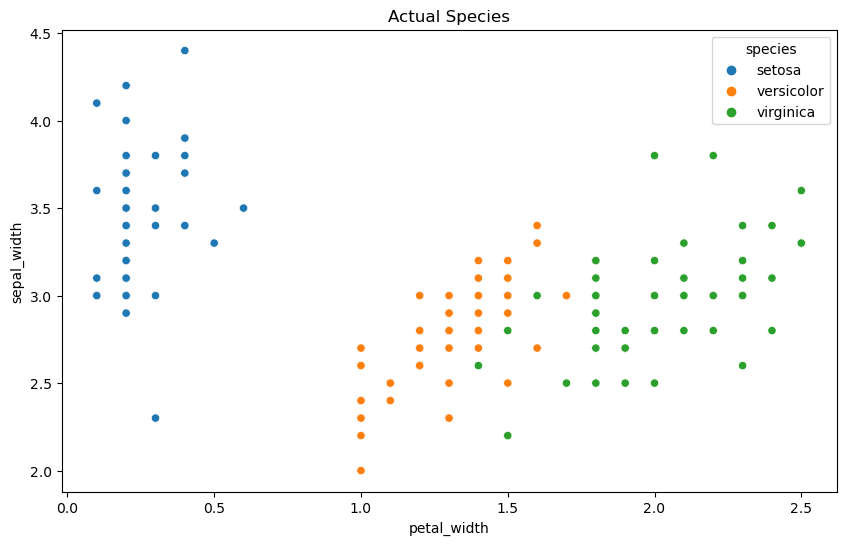

In [10]:
# plot actual species
# this changes the color of observations based on species rather than cluster

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = iris, hue = 'species')
plt.title('Actual Species')

1d. Repeat the clustering, this time with 3 different features.

In [11]:
# use petal_length, sepal_length and petal_width for clustering

X = iris[['petal_length', 'sepal_length', 'petal_width']]

# Use the functions above to create clusters and visualize 

iris, X_scaled, scaler, kmeans, centroids = create_cluster(iris, X, 3)

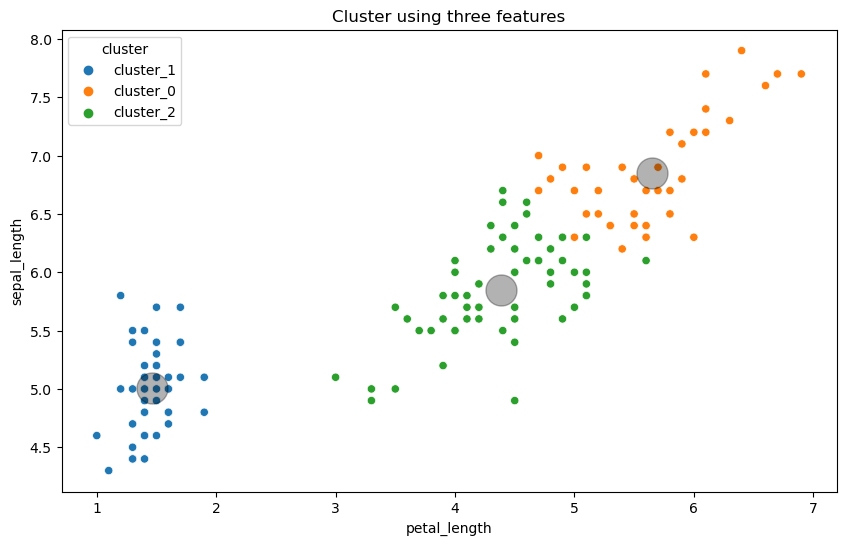

In [12]:
# create scatter plot  (observations labeled by cluster)

create_scatter_plot('petal_length','sepal_length',iris,kmeans, X_scaled, scaler)
plt.title('Cluster using three features');

Text(0.5, 1.0, 'Actual Species')

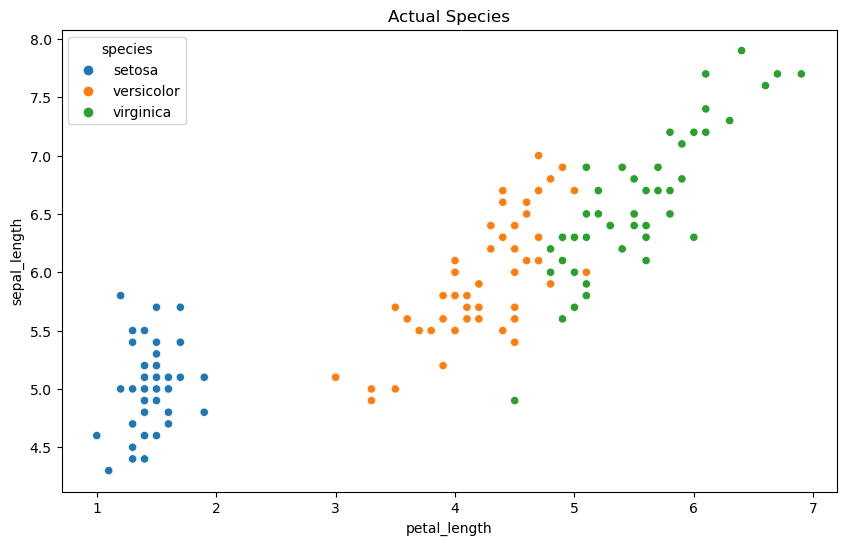

In [13]:
# lets look at scatter plot for actual species (observations labeled by species)

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'species')
plt.title('Actual Species')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [14]:
#wrangle mall data

df = wrangle_final.acquire_mall(username = env.username,
    password = env.password,
    host = env.host,
    db = 'mall_customers')

In [15]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df = wrangle_final.preprocess_mall(df)

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df.head()

,customer_id,age,annual_income,spending_score,is_male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [21]:
# explore data based on annual_income and spending score

X = df[['annual_income', 'spending_score']]
X.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
# create a scaled dataframe
# NOTE: Scaling data is done to compare numeric values of features with different units of measure.

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


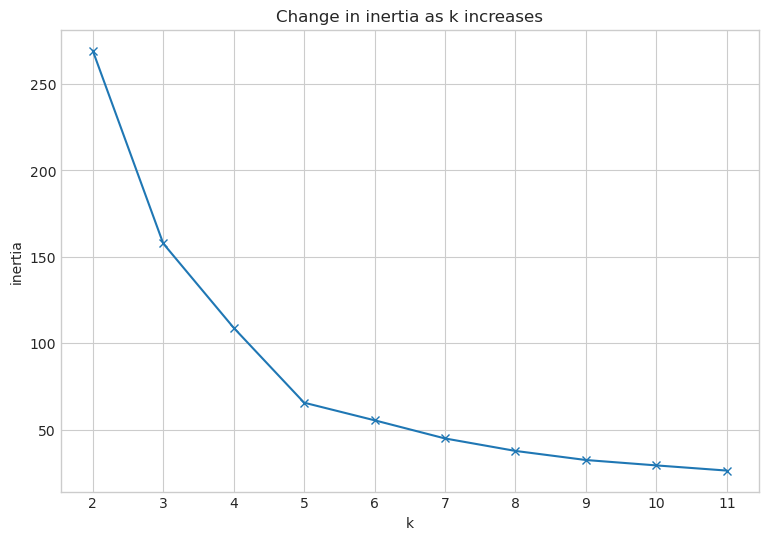

In [23]:
# determine what values of k might be appropriate

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

The elbow chart above seems to suggest that '5' might be a good value for k (i.e. number of clusters.)

In [24]:
# use the function to create clusters

df, X_scaled, scaler, kmeans, centroids = create_cluster(df, X, 5)

<Figure size 1400x900 with 0 Axes>

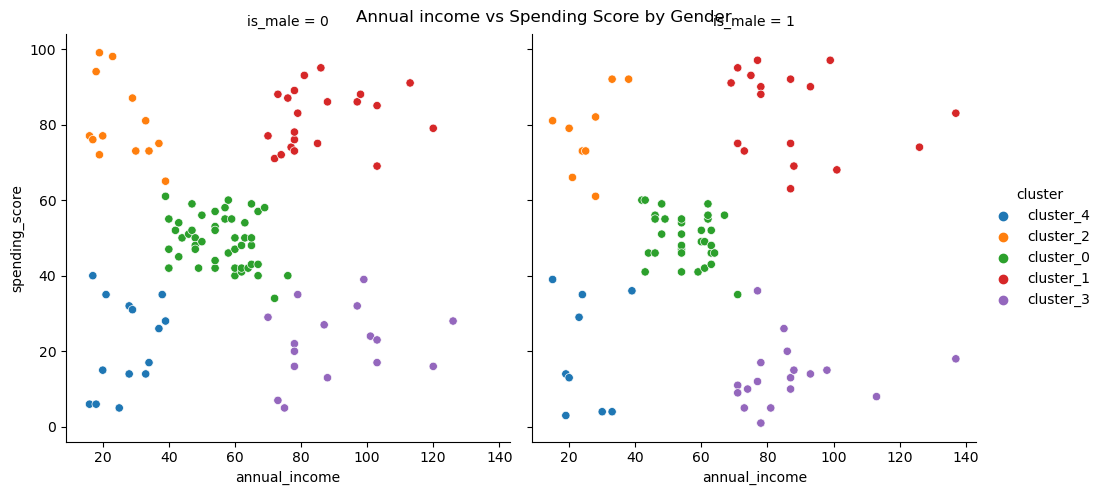

In [25]:
# scatter plot of data with obervations labeled by cluster

plt.figure(figsize=(14, 9))
sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster', col = 'is_male')
plt.suptitle('Annual income vs Spending Score by Gender');

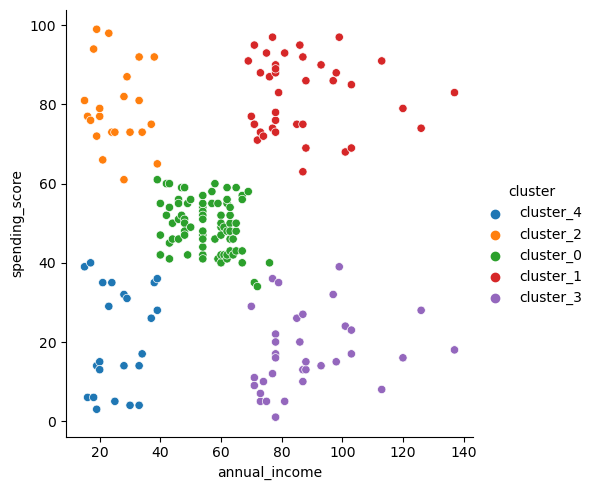

In [26]:
# clusters visualized (all genders)

sns.relplot(x = 'annual_income', y = 'spending_score', data = df, hue = 'cluster')

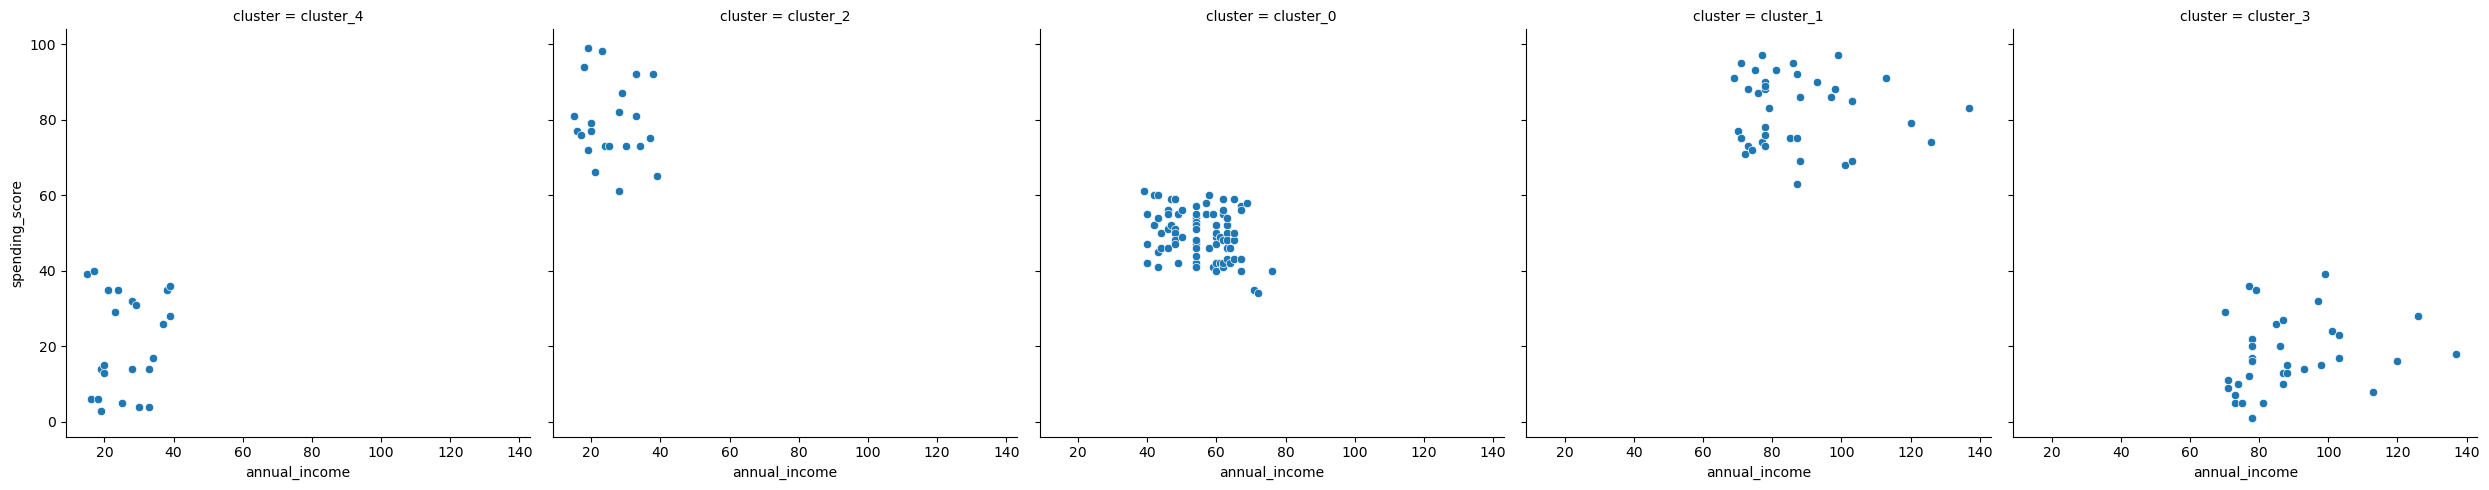

In [27]:
# plot annual incomes vs spending score for different clusters

sns.relplot(x = 'annual_income', y = 'spending_score', data = df, col = 'cluster')

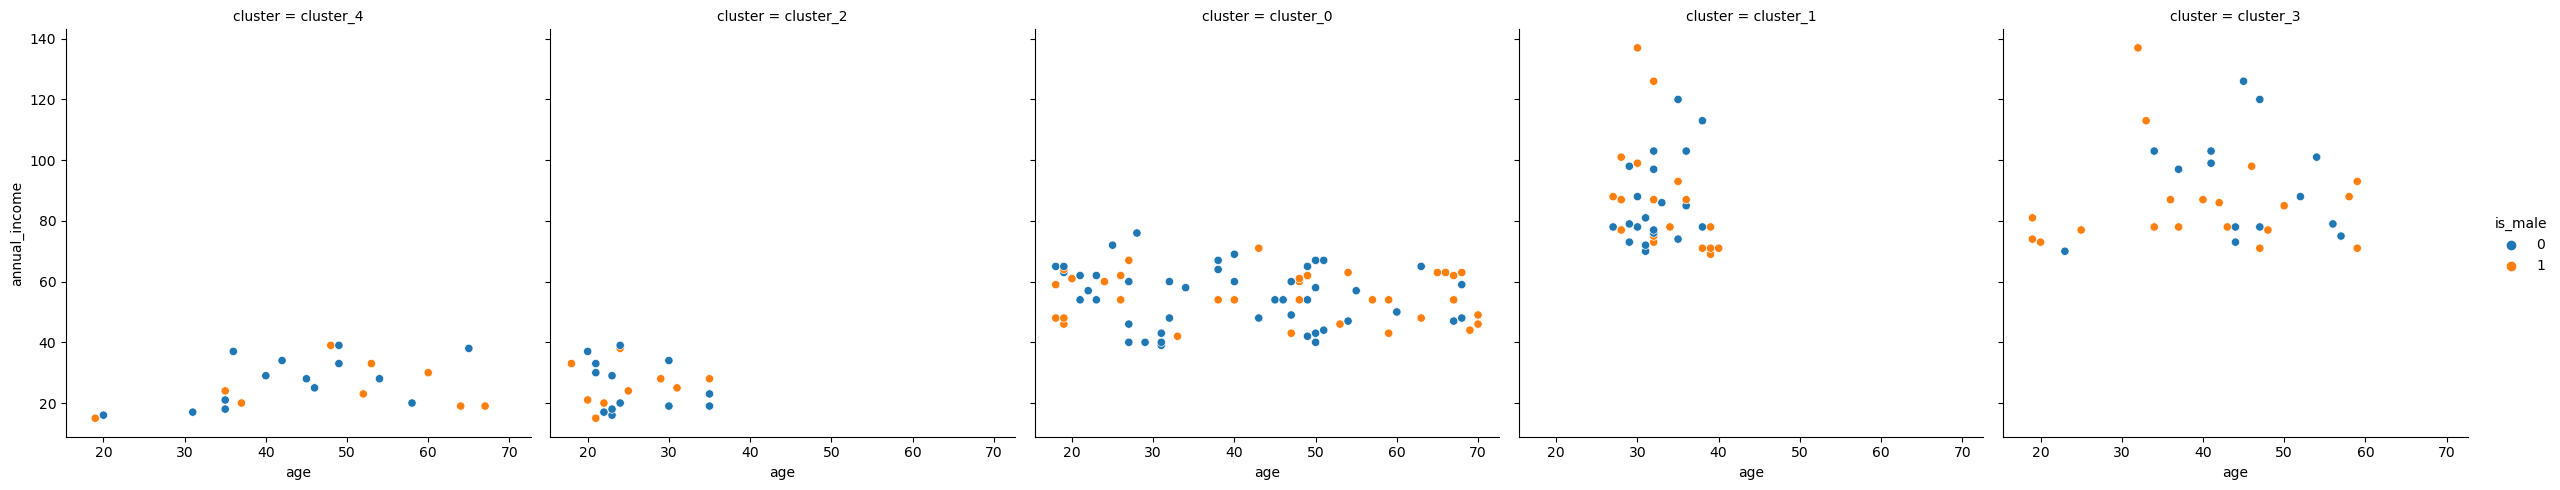

In [28]:
# visualize clusters by age and annual income 

sns.relplot(x = 'age', y = 'annual_income', data = df, col = 'cluster', hue = 'is_male')

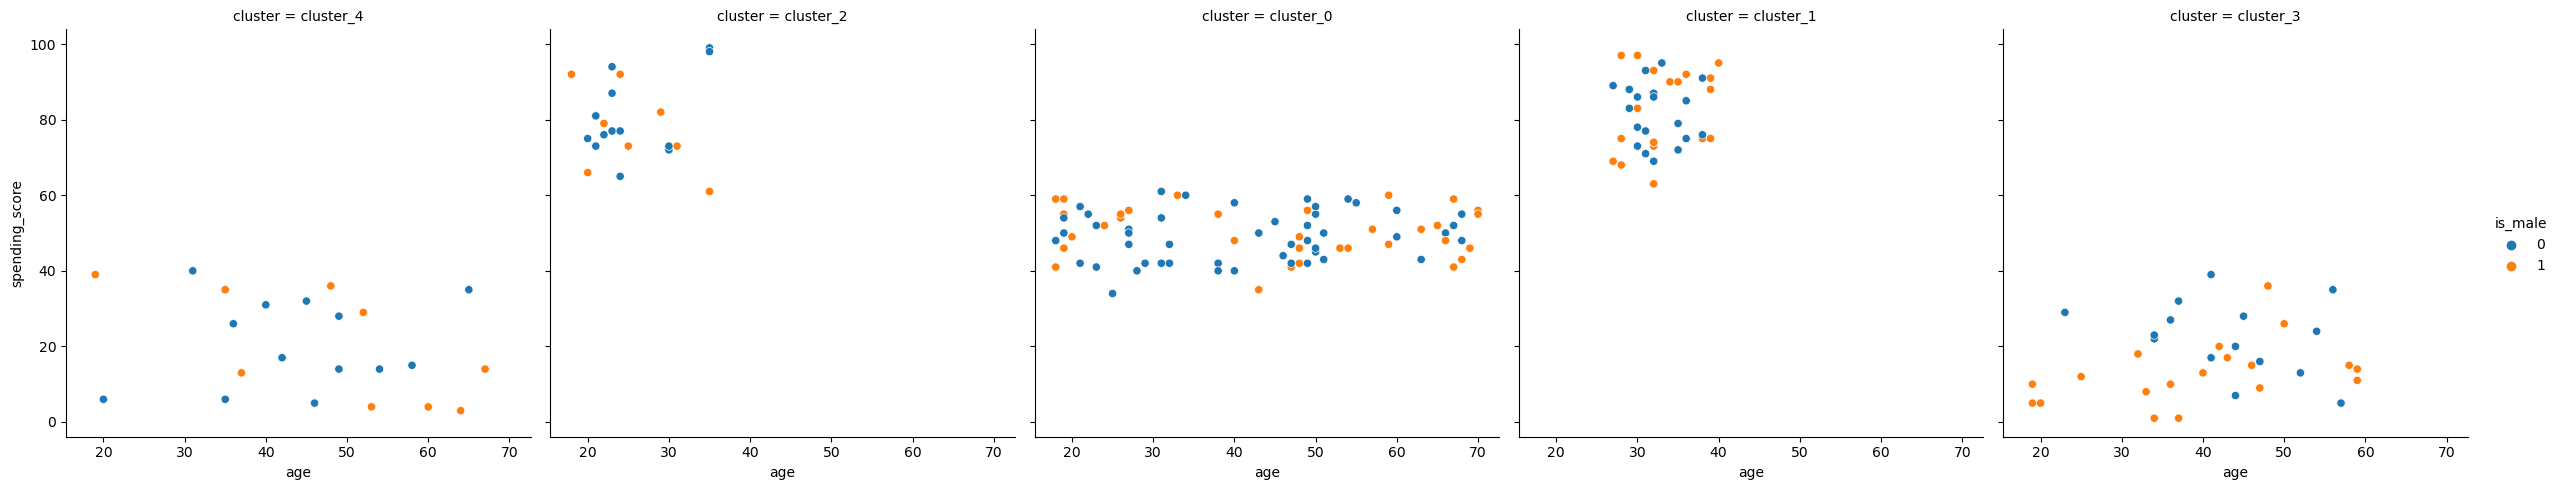

In [29]:
# lets visualize clusters by age and spending score

sns.relplot(x = 'age', y = 'spending_score', data = df, col = 'cluster', hue = 'is_male')

Customer profiles based on visuals above:

Cluster 0: 20-35s age range, lower income range, high spending score

Cluster 1: all age ranges, average income range, average spending score

Cluster 2: all age ranges, upper half of income range, lower spending score

Cluster 3: all age ranges, lower half of income range, lower spending

Cluster 4: 30s and 40s('millennials'), upper half of income range, higher spending score

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.